In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def histogram(num_bins = 100, protease = None, min_acc = 0, column_distribution = None, req_ls = [], path = "../Results/validation_results.txt"):
    df = pd.read_csv(path, index_col = False, sep = "\t")
    # select by protease
    if protease != None:
        if "[" in protease:
            df = df.loc[df["Dataset"].map(lambda x: ("protease_"+protease+"_selector") in x and "[" in x)]
        else:
            df = df.loc[df["Dataset"].map(lambda x: ("protease_"+protease+"_selector") in x and "[" not in x)]
    else: protease = "All"
    # remove models under some accuracy
    df = df.loc[df["Validation Accuracy"].map(lambda x: x > min_acc)]
    # filter by some req
    for req in req_ls: df = df.loc[df[req[0]].map(lambda x: str(req[1]) in str(x))]
    num = len(list(df["Validation Accuracy"]))
    print(f"Number of models that meet requirements: {num}")
    # plot categories or all
    if column_distribution == None:
        x = list(df["Validation Accuracy"])
        bins = np.linspace(min_acc, 1, int(num_bins * (1 - min_acc)))
        plt.hist(x, alpha=0.5, density=True, bins=bins)
        plt.ylabel('Frequency')
        plt.xlabel('Validation Accuracy')
        plt.title(f'Distribution for {protease} with Requirements {req_ls}')
        plt.show()
        index_best = x.index(max(x))
        print("Best Parameters")
        print(df.iloc[index_best,:])
        print(list(df["Dataset"])[index_best])
    else:
        bins = np.linspace(min_acc, 1, int(num_bins * (1 - min_acc)))
        vals = list(set(df[column_distribution]))
        vals.sort()
        for val in vals:
            temp_df = df.loc[df[column_distribution].map(lambda x: val == x)]
            x = list(temp_df["Validation Accuracy"])
            plt.hist(x, bins, alpha=0.5, label=val)
        plt.title(f'Distribution for {protease} with Requirements {req_ls}')
        plt.ylabel('Frequency')
        plt.xlabel('Validation Accuracy')
        plt.legend(loc='upper left', title=column_distribution)
        plt.show()
    

Number of models that meet requirements: 1091


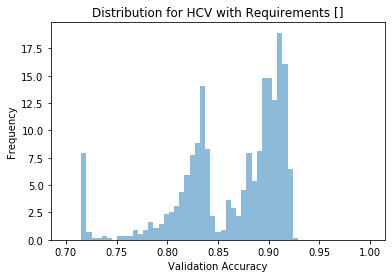

Best Parameters
Dataset                         protease_HCV_selector_k_nearest_ratio_0_params_3
Test Dataset                                                             testset
Validation Accuracy                                                     0.926431
Max Epochs                                                                  1000
Final Epoch                                                                  420
Model                                                                  gcn_cheby
Max Degree                                                                     3
Learning Rate                                                              0.005
Dropout                                                                      0.2
Attention Dimension                                                           10
Attention Bias                                                                 3
Graph Convolution Dimensions                                         [20,20,20,]
Fully Connec

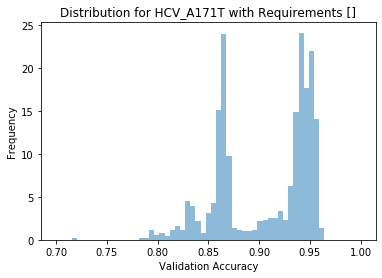

Best Parameters
Dataset                         protease_HCV_A171T_selector_k_nearest_ratio_0_...
Test Dataset                                                              testset
Validation Accuracy                                                      0.961393
Max Epochs                                                                   1000
Final Epoch                                                                   956
Model                                                                   gcn_cheby
Max Degree                                                                      3
Learning Rate                                                                0.01
Dropout                                                                       0.2
Attention Dimension                                                            10
Attention Bias                                                                  2
Graph Convolution Dimensions                                             [20,20,]


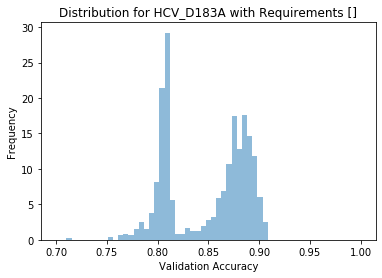

Best Parameters
Dataset                         protease_HCV_D183A_selector_k_nearest_ratio_0_...
Test Dataset                                                              testset
Validation Accuracy                                                      0.908094
Max Epochs                                                                   1000
Final Epoch                                                                   609
Model                                                                   gcn_cheby
Max Degree                                                                      3
Learning Rate                                                               0.005
Dropout                                                                       0.2
Attention Dimension                                                            10
Attention Bias                                                                  3
Graph Convolution Dimensions                                                [20,]


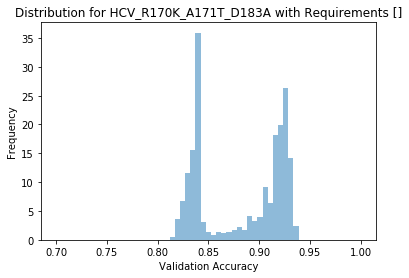

Best Parameters
Dataset                         protease_HCV_R170K_A171T_D183A_selector_k_near...
Test Dataset                                                              testset
Validation Accuracy                                                      0.938597
Max Epochs                                                                   1000
Final Epoch                                                                   758
Model                                                                   gcn_cheby
Max Degree                                                                      3
Learning Rate                                                               0.005
Dropout                                                                       0.2
Attention Dimension                                                            10
Attention Bias                                                                  3
Graph Convolution Dimensions                                          [10,10,10,]


In [139]:
proteases = ["HCV", "HCV_A171T", "HCV_D183A", "HCV_R170K_A171T_D183A"]
for p in proteases:
    histogram(num_bins = 200, protease = p, min_acc = .7)#, req_ls = [("Dataset","10_ang_ratio_0")])
    #histogram(num_bins = 200, protease = p, min_acc = .7, req_ls = [("Dataset","8_ang_ratio_0")])
    #histogram(num_bins = 200, protease = p, min_acc = .7, req_ls = [("Dataset","k_nearest_ratio_0")])

Number of models that meet requirements: 602


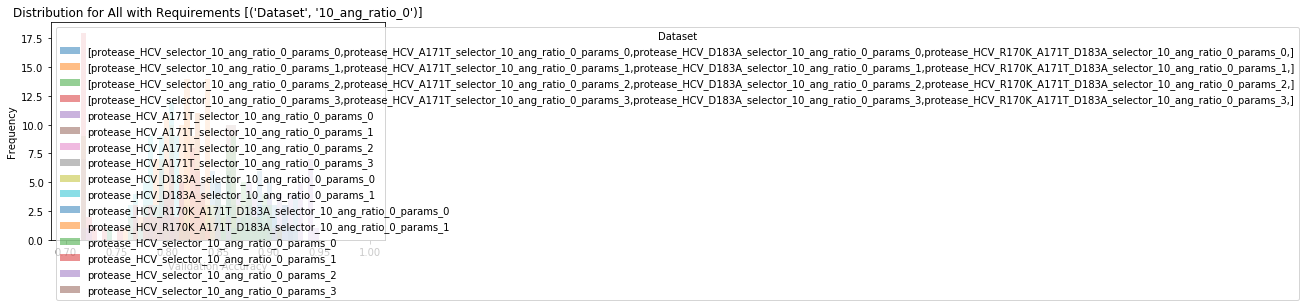

In [136]:
histogram(num_bins = 200, min_acc = .7,
              req_ls = [("Dataset","10_ang_ratio_0")], column_distribution="Dataset")

Number of models that meet requirements: 142


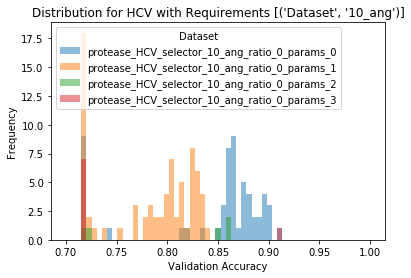

Number of models that meet requirements: 270


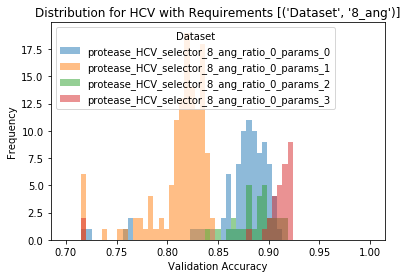

Number of models that meet requirements: 679


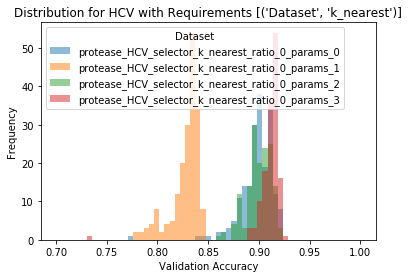

Number of models that meet requirements: 121


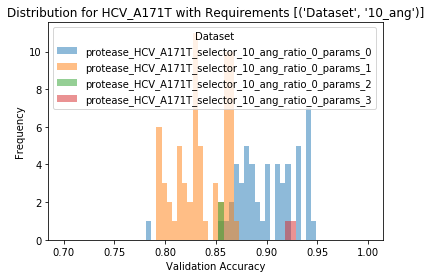

Number of models that meet requirements: 240


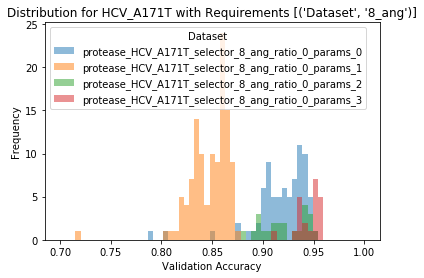

Number of models that meet requirements: 641


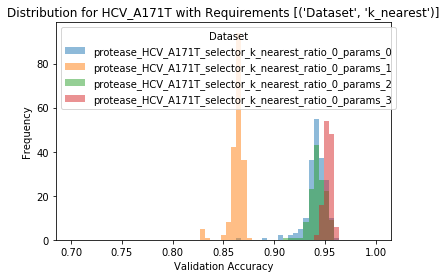

Number of models that meet requirements: 100


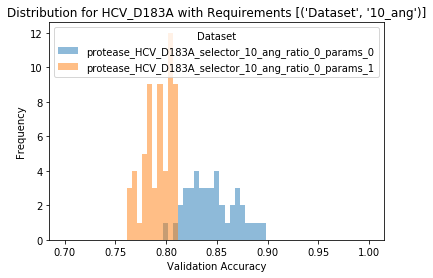

Number of models that meet requirements: 203


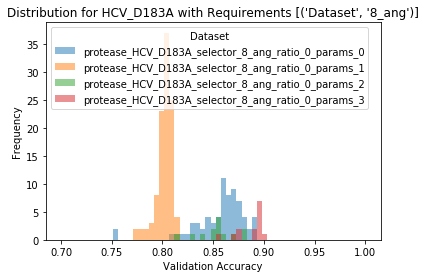

Number of models that meet requirements: 633


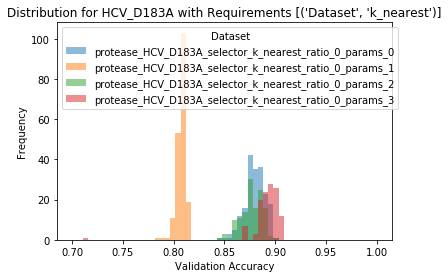

Number of models that meet requirements: 91


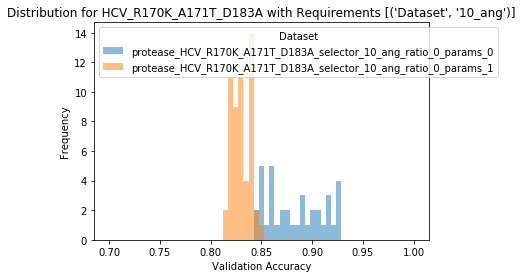

Number of models that meet requirements: 185


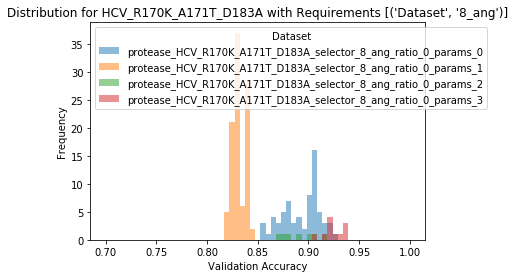

Number of models that meet requirements: 611


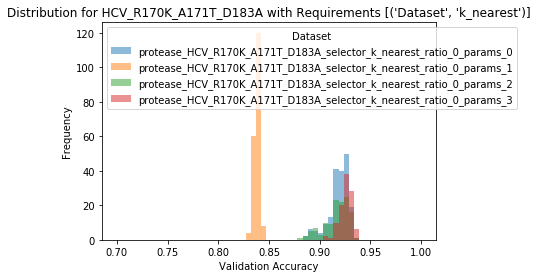

In [137]:
proteases = ["HCV", "HCV_A171T", "HCV_D183A", "HCV_R170K_A171T_D183A"]
neighborhoods = ["10_ang", "8_ang", "k_nearest"]
for p in proteases:
    for neighbor in neighborhoods:
        histogram(num_bins = 200, protease = p, min_acc = .7,
              req_ls = [("Dataset",neighbor)], column_distribution="Dataset")